# The goal of the project was to use a linear regression model to predict the price of the car by understanding how the independent variables will affect the dependent variable ie price. 

In [1]:
#importing the necessary libraries pandas for df's and numpy for numerical calculations
import pandas as pd
import numpy as np

#importing plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline

#importing linear regression model for analysis
from sklearn.linear_model import LinearRegression

In [2]:
#The column names have been initiated since it wasn't available in the dataset
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",names = ['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_of_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price'])

In [3]:
#Understanding dataset with all columns and first 5 rows
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
df.shape  #205 rows and 26 columns of data

(205, 26)

In [5]:
df.head(2).transpose() #Did not show any value in applying a transpose function

,0,1
symboling,3,3
normalized_losses,?,?
make,alfa-romero,alfa-romero
fuel_type,gas,gas
aspiration,std,std
num_of_doors,two,two
body_style,convertible,convertible
drive_wheels,rwd,rwd
engine_location,front,front
wheel_base,88.6,88.6


In [6]:
df.dtypes #understanding the datatypes is very important, Object represents string data types

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [7]:
# we are working on a linear regression model so all the attributes must be in numerical values
# drop all the object data types that aren't really necessary (based on assumption - keeping 5 necessary ones)

df = df.drop('fuel_type', axis=1)
df = df.drop('engine_location', axis=1)
df = df.drop('num_of_doors', axis=1)
df = df.drop('body_style', axis=1)
df = df.drop('drive_wheels', axis=1)
df = df.drop('engine_type', axis=1)
df = df.drop('fuel_system', axis=1)
df = df.drop('aspiration', axis=1)
df = df.drop('normalized_losses', axis=1)
df = df.drop('make', axis=1)

In [8]:
df.dtypes   #revisting the datatypes of all the columns

symboling              int64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
num_of_cylinders      object
engine_size            int64
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [9]:
# Cylinder column had values ranging from 1-12 so creating a dict and assigning values to them
df['cylinder'] = df['num_of_cylinders'].replace({'one':1, 'two': 2, 'three': 3, 'four': 4, 'five':5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10, 'eleven': 11, 'twelve': 12})

In [10]:
# Checking the datatype of cylinder
df['cylinder'].dtypes

dtype('int64')

In [11]:
# Replacing NULL Values with NA, here in the dataset the N/A is represented by ? so we'll replace that
df = df.replace("?", np.nan)

In [12]:
df.isnull().sum() # Understand if there are any NAN values

symboling            0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
num_of_cylinders     0
engine_size          0
bore                 4
stroke               4
compression_ratio    0
horsepower           2
peak_rpm             2
city_mpg             0
highway_mpg          0
price                4
cylinder             0
dtype: int64

In [13]:
df.dtypes #just love revisting the data types for analysis

symboling              int64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
num_of_cylinders      object
engine_size            int64
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
cylinder               int64
dtype: object

In [14]:
df = df.drop('num_of_cylinders', axis=1) #created another column called cylinder so dont want duplicates

In [15]:
df.dtypes #re-visiting to check if the column was dropped

symboling              int64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_size            int64
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
cylinder               int64
dtype: object

In [16]:
# Changing attribute value from object to float
# Technically changed all the data types belonging to object to float

df['bore'] = df['bore'].astype('float64')
df['stroke'] = df['stroke'].astype('float64')
df['horsepower'] = df['horsepower'].astype('float64')
df['peak_rpm'] = df['peak_rpm'].astype('float64')
df['price'] = df['price'].astype('float64')

In [17]:
df.dtypes #checking if the necessary changes made are reflecting

symboling              int64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_size            int64
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
cylinder               int64
dtype: object

In [18]:
df.isnull().sum() #now that the data type is changed checking again for NAN values

symboling            0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
bore                 4
stroke               4
compression_ratio    0
horsepower           2
peak_rpm             2
city_mpg             0
highway_mpg          0
price                4
cylinder             0
dtype: int64

In [19]:
# As we can see above there are missing numerical values so the goal here is to fill them up with a median value
# median is used to avoid outliers and is general best pratice

df['bore'] = df['bore'].fillna(df['bore'].median())
df['stroke'] = df['stroke'].fillna(df['stroke'].median())
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())
df['peak_rpm'] = df['peak_rpm'].fillna(df['peak_rpm'].median())
df['price'] = df['price'].fillna(df['price'].median())

In [20]:
df.isnull().sum() # Now checking for NAN values

symboling            0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
cylinder             0
dtype: int64

In [21]:
df.describe().transpose() # Basic Statistical analysis

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheel_base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb_weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
engine_size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,205.0,3.329366,0.270858,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.256098,0.313634,2.07,3.11,3.29,3.41,4.17
compression_ratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


In [22]:
import seaborn as sns # for plotting

In [23]:
# creating a new df with : representing all rows and 1:17 representing the indexed columns required
df2 = df.iloc[:,1:16]

In [24]:
df2.head(5)

,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,cylinder
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,4
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,4
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,6
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,4
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,5


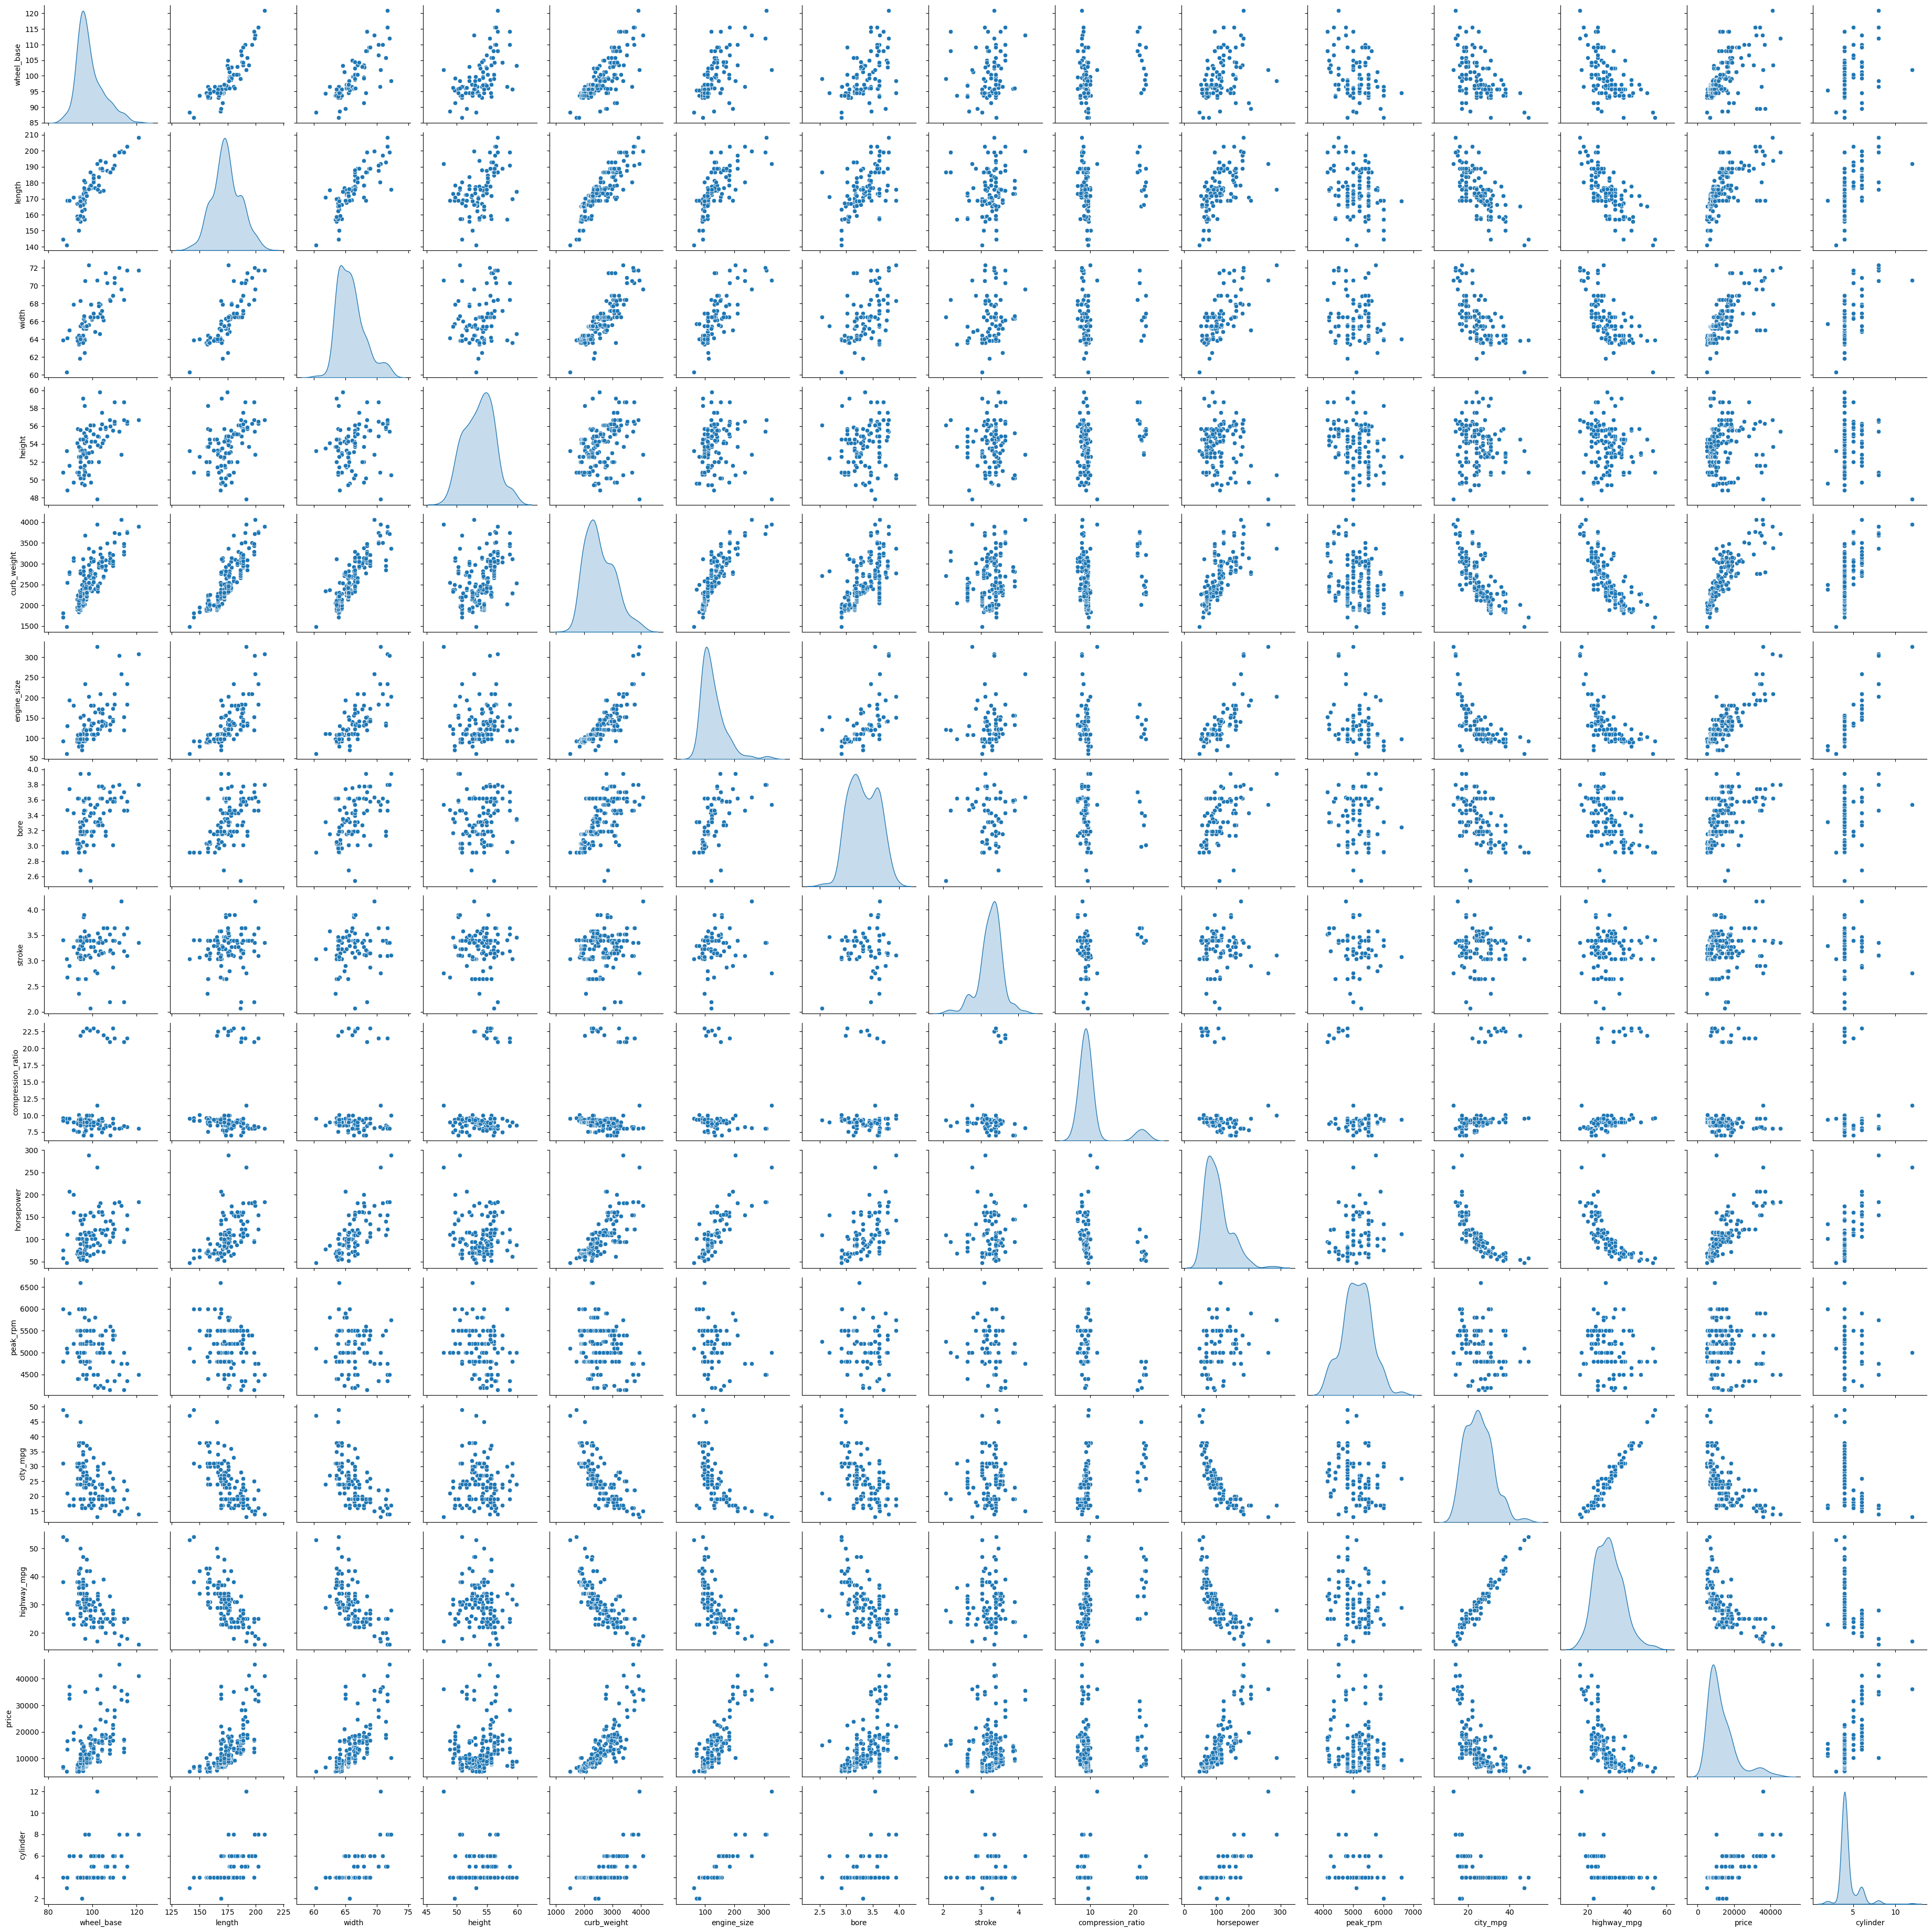

In [45]:
sns.pairplot(df2, diag_kind="kde") #KDE = Kernel density estimate

1. Pair plot shot clear relations between price and height, weight engine size number of cylinders and inversely related to mpg.

2. The data seems to be a mix of both high end and economy cars creating clusters on the lower end in many attributes and long tails in others 

3. Decision tree and linear regression models can be a good start

In [28]:
#Statistical Analysis

# since price is dependant drop it and copy the remaining variables onto a new df called x for ex.
X = df.drop('price', axis=1)

# copy the price column alone onto a new df called y for ex.
Y = df[['price']]

In any sort of statistical analysis the x column will not have the predictor variable ie in this situation price where as the Y column (which always represents the predictor column) will have price

in short, column x - price dropped, column y - only price considered

In [29]:
# Let us break the X and y dataframes into training set and test set. For this we will use
# Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

In [30]:
# Split X and Y into training and test set in 75:25 ratio

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

1. X_train, X_test, Y_train, Y_test is a standard format for creating the variable so remember
2. test size is set at 0.25 since the data is split in 75:25 ratio
3. random state is like seed ie. initating the sequence from a random integer which is set here as 1 for absolute      randomness

In [55]:
# invoke the LinearRegression function and find the bestfit model on training data
# variable model calls out linear regression

model = LinearRegression() 
model.fit(X_train, Y_train)

LinearRegression()

Linear regression stats formula is y = mx + c - here, we are predicting m and c (given x and y) 
1. m = co-effecients (in general each column [variable] constitutes to a co-effecient 
2. c = intercept

So the below analysis will help us understand with every 1 unit increase in m what will be the increase in y or vice versa. 

In [56]:
# Let us explore the coefficients for each of the independent attributes ie in y = mx + b

for idx, col_name in enumerate(X_train.columns):
    print("The co-effecients of {} is {}". format(col_name, model.coef_[0][idx]))

The co-effecients of symboling is 88.5779490097395
The co-effecients of wheel_base is 71.82402760935148
The co-effecients of length is -93.38447872012
The co-effecients of width is 479.8164355926804
The co-effecients of height is 315.20384001212096
The co-effecients of curb_weight is -0.865732689135065
The co-effecients of engine_size is 251.74362582792094
The co-effecients of bore is -6832.550987635415
The co-effecients of stroke is -5085.818859790593
The co-effecients of compression_ratio is 335.7682519296412
The co-effecients of horsepower is -0.03898796131285831
The co-effecients of peak_rpm is 2.430049493582409
The co-effecients of city_mpg is -201.8171320034717
The co-effecients of highway_mpg is -41.93431935731763
The co-effecients of cylinder is -3176.1760903729632


1. The above analysis shows, for every 1 unit increase in symboling the price of the car goes up by 88.58

2. for every 1 unit increase in wheel_base the price of the car goes up by 71.82 (+ve co-relation)

3. for every 1 unit decrease in bore the price of the car goes down by 6832 (negative co-relation)

4. Domain knowledge is very important here since sometimes the co-effecients can show distorted relationships for example if length increases ideally the price of the car should increase but the above data shows a negative co-relation so we should not "completely" depend on this. this is usually due to multi-colinearity. 

5. Multi-colinearity = Multicollinearity refers to a situation where two or more independent variables in a regression model are highly correlated with each other. This can be problematic because it makes it difficult to determine the separate effects of each independent variable on the dependent variable.


In [57]:
# Let us check the intercept for the model ie. the value of c in the equation

intercept = model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -12323.06017457035


In [58]:
# Understanding how the models perfomed and understanding the score
model.score(X_train, Y_train)

0.8207743559309415

How can the model peformance be improved?

1. Always address outliers first. Linear models get easily impacted by outliers
2. We noticed that on many attributes, there was a clump of data points on lower values and scattered on high values
3. That is an indication of mixing data from two or more different segments. Maybe if we segregate the data we will get better results
4. Not all attributes show a linear relation to price. Convert these attributes to quadratic form which may give a better fit on linear model

In [36]:
#Importing statistics models 

import statsmodels.formula.api as smf

In [37]:
# put the X and Y together in a single array for OLS to work (ordinary least squares)

cars = pd.concat([X_train, Y_train], axis=1)

In [38]:
cars.dtypes # understanding the dataset

symboling              int64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_size            int64
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
cylinder               int64
price                float64
dtype: object

In [39]:
# here we are regressing the dependent variable ie price on all the independent variables
cars1 = smf.ols(formula= 'price ~ symboling + wheel_base + length + width + height + curb_weight +  engine_size + bore + stroke + compression_ratio + horsepower + peak_rpm + city_mpg + highway_mpg  + cylinder', data=cars).fit()

In [40]:
cars1

In [41]:
cars1.params #params will give you all the co-effecients and intercept values

Intercept           -12323.060175
symboling               88.577949
wheel_base              71.824028
length                 -93.384479
width                  479.816436
height                 315.203840
curb_weight             -0.865733
engine_size            251.743626
bore                 -6832.550988
stroke               -5085.818860
compression_ratio      335.768252
horsepower              -0.038988
peak_rpm                 2.430049
city_mpg              -201.817132
highway_mpg            -41.934319
cylinder             -3176.176090
dtype: float64

In [42]:
print(cars1.summary()) #regression results 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     41.83
Date:                Sat, 22 Apr 2023   Prob (F-statistic):           1.31e-43
Time:                        12:49:03   Log-Likelihood:                -1455.7
No. Observations:                 153   AIC:                             2943.
Df Residuals:                     137   BIC:                             2992.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -1.232e+04   1.92e+0